In [4]:
# magic strings
%matplotlib inline

In [5]:
from matplotlib import pyplot as plt
import numpy

In [6]:
# importing data
data = [
[2, 1, 0],
[3, 1, 0],
[2, .5, 0],
[1, 1, 0],
[3, 1.5, 1],
[3.5, .5, 1],
[4, 1.5, 1],
[5.5, 1, 1]
]

mystery_flower = [4.5, 1]

In [7]:
weight1 = numpy.random.randn()
weight2 = numpy.random.randn()
bais = numpy.random.randn()

## Sigmoid
Sigmoid is mathematical function that takes any integer and always
return a value between 0 and 1 (inclusive)
<br>
Mathematically it can be written as sigma $\large \sigma = \frac{1}{1 + e^{-x}}$

In [8]:
"""
Sigmoid function
"""
def sigmoid(x:int)->int:
    """
    Returns the sigmoid value.
    i.e., for any integer, this function will always return values between 0 and 1
    """
    return 1/ (1 + numpy.exp(-x))

In [10]:
def sigmoid_prime(x:int)->int:
    """
    Sigmoid prime function
    Returns the derivative of sigmoid value.
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [11]:
t = numpy.linspace(-5,5,100)
sigmoid_t = sigmoid(t)
sigmoid_p = sigmoid_prime(t)

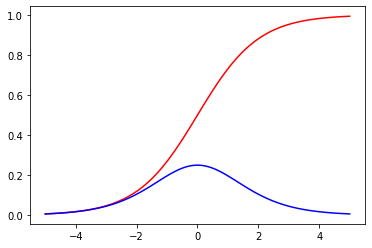

In [12]:
plt.plot(t, sigmoid_t, c='r')
plt.plot(t, sigmoid_p, c='b')

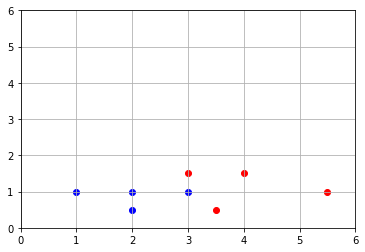

In [13]:
plt.axis([0,6,0,6])
plt.grid()
for index in range(len(data)):
    point = data[index]
    color = 'r' if point[2] == 1 else 'b'
    plt.scatter(point[0], point[1], c=color)
plt.show()

We need to find derivations for $cost$ with respect to $pred$ <br>
then, we need to find derivations for $pred$ w.r.t $sigmoid$ <br>
then, we need to find derivations of $z$ w.r.t $weight1$, $weight2$, $bais$
<br> <br>
this is because at each stage we need to find rate of change (derivation) for each of it's dependent steps. <br>
Example:
$$\frac{\partial cost}{\partial pred} = (pred - target)^{2}$$
$$\frac{\partial cost}{\partial pred} = 2(pred - target) \because chain-rule $$
$$\frac{\partial pred}{\partial z} = sigmoid'$$

z: -4.205338037716263 pred: 0.014696533415645904 cost: 0.9708229212631454 red
z: 1.285952739338648 pred: 0.7834613605417735 cost: 0.046888982378419805 red
z: 5.969096784989074 pred: 0.9974499697880691 cost: 6.502654081760342e-06 red
z: -1.1245806600799124 pred: 0.24516260700559328 cost: 0.060104703873778975 blue
z: -2.9973275757253015 pred: 0.04754675050525232 cost: 0.0022606934836087115 blue
z: 5.186493514339968 pred: 0.9944395126337701 cost: 3.0919019750002753e-05 red
z: 1.8095384046181273 pred: 0.8593060770349681 cost: 0.019794779959290333 red
z: -4.986140347979845 pred: 0.00678562348335669 cost: 4.604468605788178e-05 blue
z: 2.273267258123747 pred: 0.9066387123615598 cost: 0.008716330029507568 red
z: -2.5302422673316656 pred: 0.07376509226755308 cost: 0.00544128883724062 blue
z: -4.385175139890327 pred: 0.012307347344909778 cost: 0.00015147079866825776 blue
z: -0.4937349176272754 pred: 0.3790141120453285 cost: 0.14365169712950882 blue
z: -0.7555875523891658 pred: 0.3196050219983724

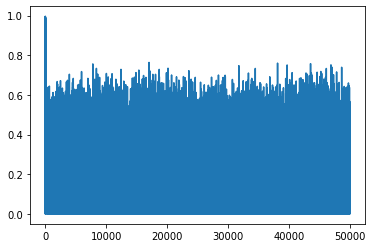

In [58]:
learning_rate = 0.2
costs = []

weight1 = numpy.random.randn()
weight2 = numpy.random.randn()
bais = numpy.random.randn()

for index in range(50000):
    random_index = numpy.random.randint(len(data))
    petal_height, petal_width, target = data[random_index]
    z = (petal_height * weight1) + (petal_width * weight2) + bais
    pred = sigmoid(z)
    cost = numpy.square(pred - target)
    costs.append(cost)
    if index % 1000 == 0:
        print("z:", z, "pred:", pred, "cost:", cost, 'red' if target == 1 else 'blue')

    dcost_dpred = 2 * (pred - target)
    dpred_dz = sigmoid_prime(z)
    dz_dweight1 = petal_height
    dz_dweight2 = petal_width
    dz_dbais = 1

    dcost_dweight1 = dcost_dpred * dpred_dz * dz_dweight1
    dcost_dweight2 = dcost_dpred * dpred_dz * dz_dweight2
    dcost_dbais = dcost_dpred * dpred_dz * dz_dbais

    weight1 = weight1 - (learning_rate * dcost_dweight1)
    weight2 = weight2 - (learning_rate * dcost_dweight1)
    bais = bais - (learning_rate * dcost_dbais)
plt.plot(costs)

#TUNING HYPER PARAMS